# Create Trading Strategy using XGBRegressor generate Error Metrics Data

### Table of contents
##### Part A: Introduction
##### Part B: Data Generation
        a. Yahoo Finance Daily SPY index
        b. Feature Generator
##### Part C: XGBRegressor
##### Part D: Model Validation
##### Part E: Error Metric Generation



### Part A: Introduction

The main objective of this notebook is to create a ML-based trading strategy and generate its Error Metrics to feed in our Model Assertion Framework (notebook 2). Our model Assertion Framework aims to create a envrionment where ML and statistical-based methods are used to detect model decay and drift. Given that, the selection of the ML model is purposefully simplify to introduce data and concept drift. 


### Part B: Data Generation

In [89]:
# !pip install warnings
# !pip install seaborn
# !pip install talib-binary
# !pip install xgboost
# !pip install sktime
# !pip install hdbscan
# !pip install yfinance
# !pip install --upgrade joblib==1.1.0
# !pip install fsspec

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

#FeatureEngineering
#from talib import RSI, BBANDS, MACD, ATR, MA, MIDPRICE

#GetStrategy
import xgboost as xgb

#ValidateStrategy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import DBSCAN
import hdbscan

a. Get SPY daily trading data from yahoo finance

b. Feature Generation to add technical indicator


In [2]:
from yfinance_data_func import *

In [3]:
yfin_data = pd.read_csv ("C://Users//Joshua Dai//Desktop//ModelAssertion//Data//yfinance_clean.csv", index_col=['Date'])
yfin_data.head(1)

,Open,High,Low,Close,Adj Close,Volume,year,month,MA,MIDPRICE,dollar_vol,dollar_vol_1m,upperband,middleband,lowerband,RSI,MACD,ATR
Date,,,,,,,,,,,,,,,,,,
2000-02-18,138.875,138.875,134.625,135.3125,89.080856,9409200,2000,2,142.049479,139.59375,1.273182e+09,1.089854e+09,142.430631,138.634375,134.838119,37.603618,-1.660413,2.967091


<AxesSubplot:xlabel='Date'>

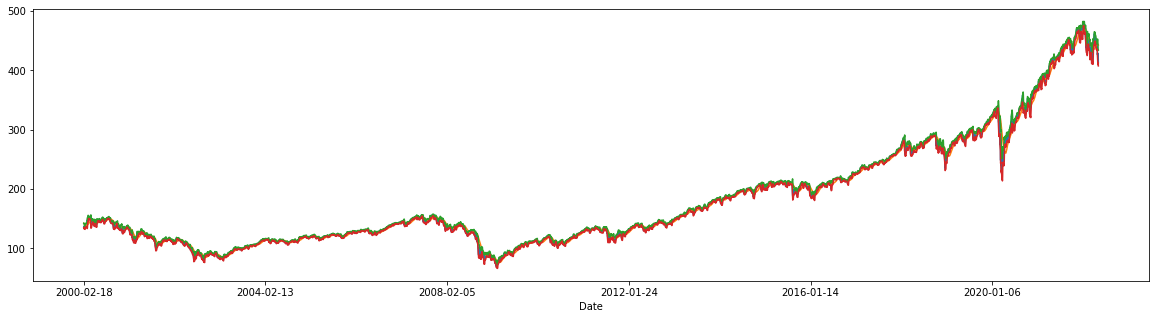

In [4]:
yfin_data['Close'].plot(figsize=(20, 5))
yfin_data['MA'].plot(figsize=(20, 5))
yfin_data['upperband'].plot(figsize=(20, 5))
yfin_data['lowerband'].plot(figsize=(20, 5))

### Part C: XGB Regressor

In [5]:
from trading_strategy_sgb import *

In [6]:
strat = Strategy_generation(yfin_data, '2016-01-01')

In [7]:
strat.train_XgbRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [8]:
result = strat.run_XgbRegressor()
result.head()

,y_pred,y_test
Date,,
2016-01-04,199.086456,201.360001
2016-01-05,200.805084,198.820007
2016-01-06,200.952133,194.050003
2016-01-07,192.093231,191.919998
2016-01-08,193.258240,192.110001


### Part D: Model Validation

In [9]:
from trading_strategy_validation import *

In [11]:
DF_SPY_result_Valid = ValidateStrategy.get_df(30,result)
DF_SPY_result_Valid.head(2)

,Date,y_pred,y_test,MAE,MSE,MAPE,sMAPE
0,2016-01-04,199.086456,201.360001,2.273544,5.169004,0.011291,0.011355
1,2016-01-05,200.805084,198.820007,2.129311,4.554767,0.010638,0.010645


<AxesSubplot:>

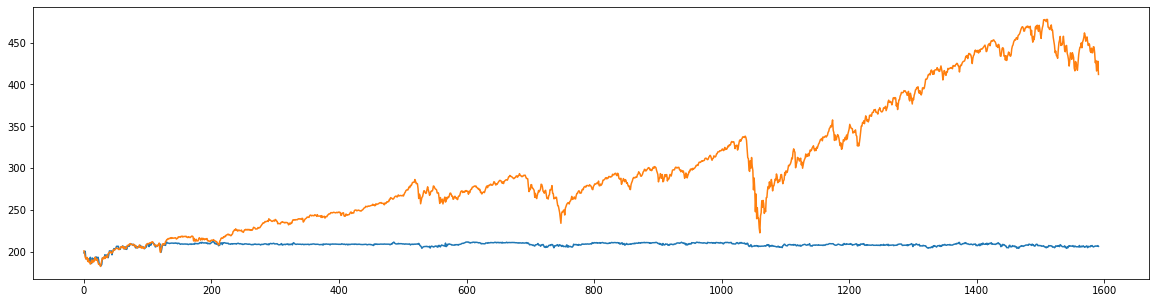

In [12]:
DF_SPY_result_Valid['y_pred'].plot(figsize=(20, 5))
DF_SPY_result_Valid['y_test'].plot(figsize=(20, 5))

<AxesSubplot:>

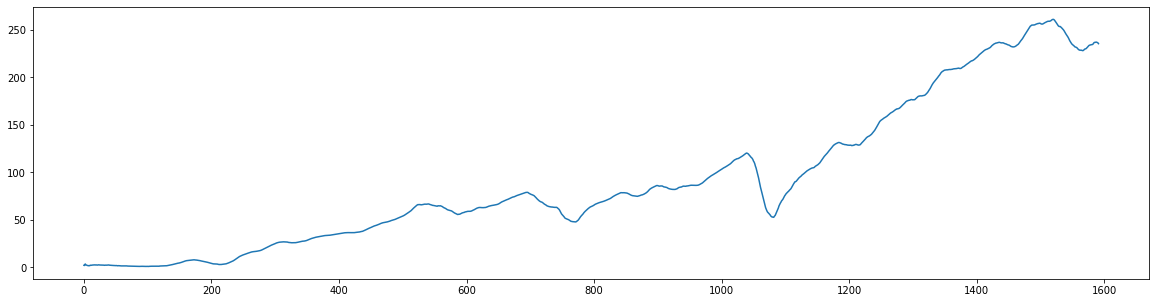

In [17]:
DF_SPY_result_Valid['MAE'].plot(figsize=(20, 5))

<AxesSubplot:>

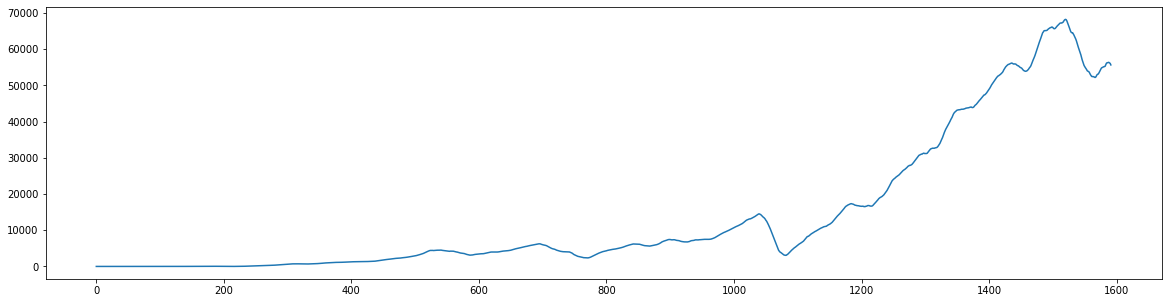

In [18]:
DF_SPY_result_Valid['MSE'].plot(figsize=(20, 5))

<AxesSubplot:>

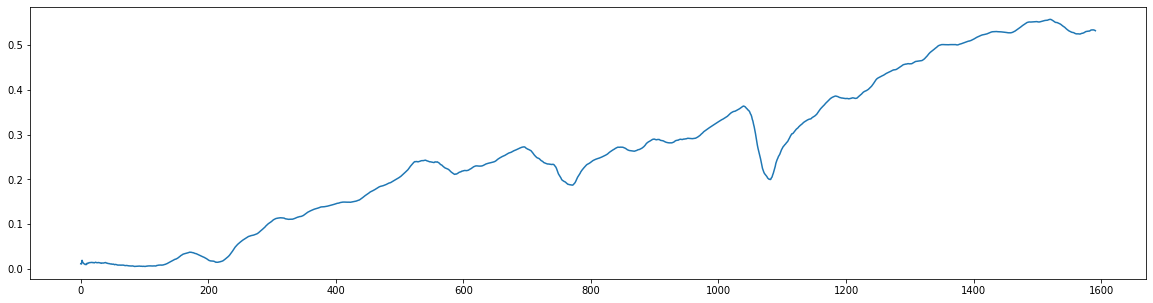

In [19]:
DF_SPY_result_Valid['MAPE'].plot(figsize=(20, 5))

<AxesSubplot:>

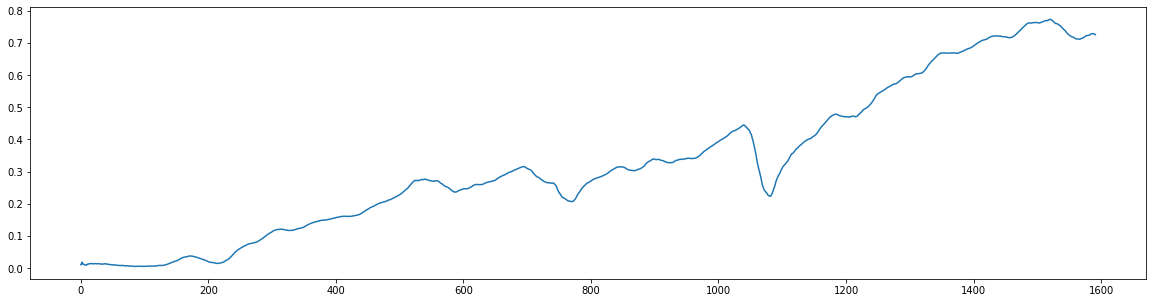

In [20]:
DF_SPY_result_Valid['sMAPE'].plot(figsize=(20, 5))